In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cd ..

/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src


In [5]:
from extractors.sequencer.flat.plotter_sequencer import PlotterSequencing
from extractors.cleaners.break_filter import BreakFilter

# Data

In [6]:
root = '../data/parsed simulations/'
files = os.listdir(root)
files = [f for f in files if 'simulation.pkl' in f]

In [15]:
breaks = {}
sequencer = PlotterSequencing()
br_filter = BreakFilter(sequencer)
for f in files:
    path = root + f
    with open(path, 'rb') as fp:
        sim = pickle.load(fp)
        begins, ends, labels = sequencer.get_sequences(sim)
        break_distribution = br_filter._get_all_breaks(begins, ends)
        breaks[f] = {
            'distribution': break_distribution,
            'permutation': sim.get_permutation()
        }
    

In [16]:
permutations = [breaks[student]['permutation'] for student in breaks]

<AxesSubplot:ylabel='count'>

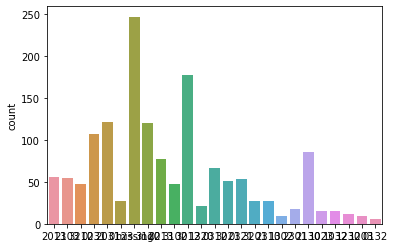

In [17]:
sns.countplot(permutations)

a## definition

In [18]:
def plot_breaks(break_distributions: list):
    """
    plot all the break distribution for the people in df
    """
    plt.figure(figsize=(12, 4))
    for student in break_distributions:
        plt.hist(break_distributions[student]['distribution'], density=True, color='dodgerblue', alpha=0.1)
        
    plt.xlim([0, 60])
    plt.show()

In [22]:
def plot_breaks(break_distributions: list):
    """
    plot all the break distribution for the people in df
    """
    plt.figure(figsize=(12, 4))
    dist = []
    for br in break_distributions:
        dist = dist + break_distributions[br]['distribution']
    for student in break_distributions:
        plt.hist(dist, density=True, color='dodgerblue', alpha=0.1)
        
    plt.xlim([0, 60])
    plt.show()

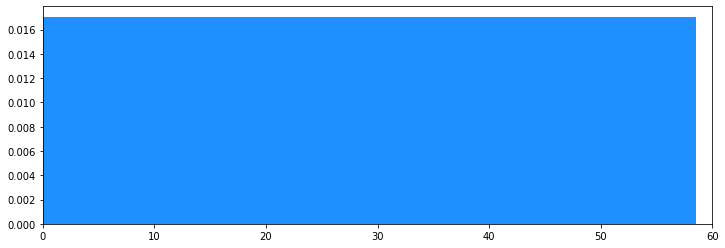

In [23]:
plot_breaks(breaks)

/opt/anaconda3/envs/PhetGPU/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


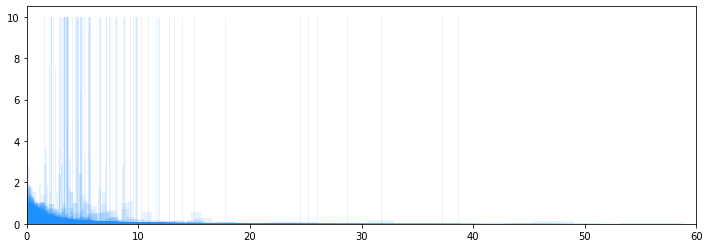

In [19]:
plot_breaks(breaks)

In [20]:
def plot_cumulative(break_distributions: list, n:int, threshold:float):
    """
    plot for n students:
    - plot the distribution of breaks, and a vertical line at the *threshold* % lower breaks
    """
    for i, student in enumerate(break_distributions):
        if i >= n:
            break
        elif len(break_distributions[student]['distribution']) < 2:
            n+=1
            continue
        else:
            # compute threshold
            breaks = [br for br in break_distributions[student]['distribution']]
            breaks.sort()
            thresh = int(threshold * len(breaks))
            thresh = breaks[thresh]
            print(len(breaks), thresh)
            
            plt.figure(figsize=(12, 4))
            plt.hist(break_distributions[student]['distribution'], color='dodgerblue', bins=range(100))
            plt.axvline(x=thresh)
            plt.xlim([0, 30])
            plt.show()
            

116 0.9470000000000027


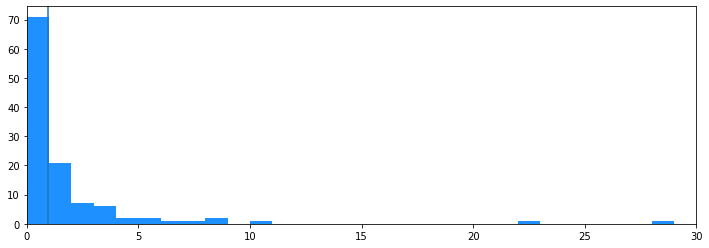

32 1.1439999999999984


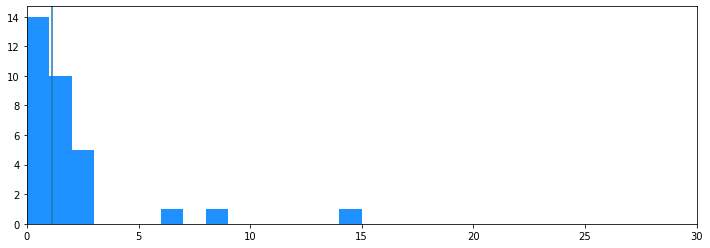

48 1.9979999999999905


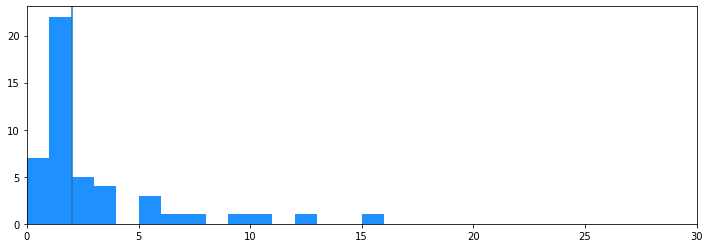

21 2.944999999999993


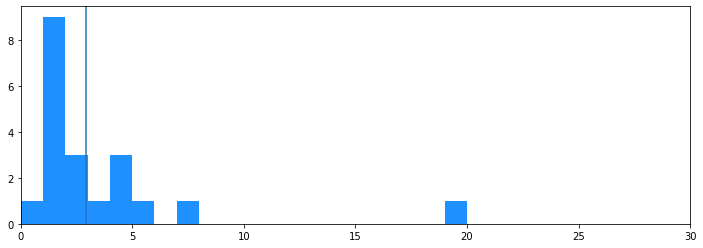

6 2.0299999999999994


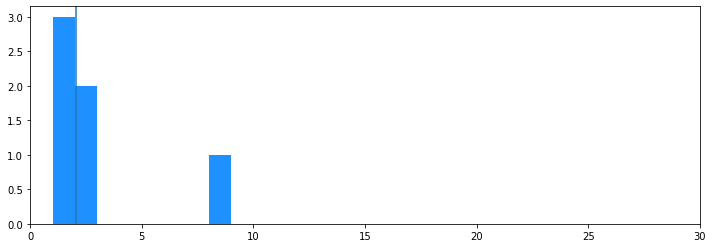

318 0.38400000000001455


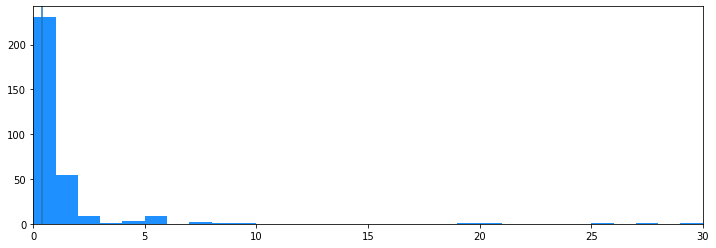

79 1.561999999999955


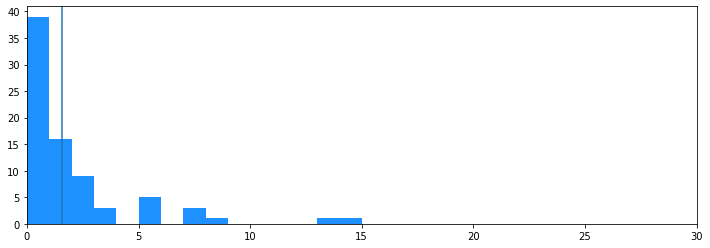

17 1.3770000000000024


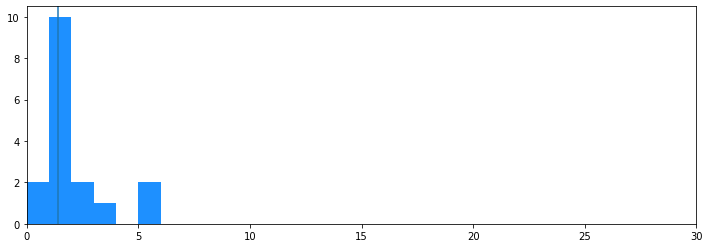

198 0.13999999999998636


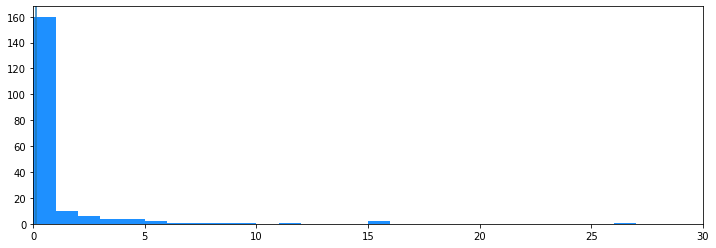

32 1.9449999999999932


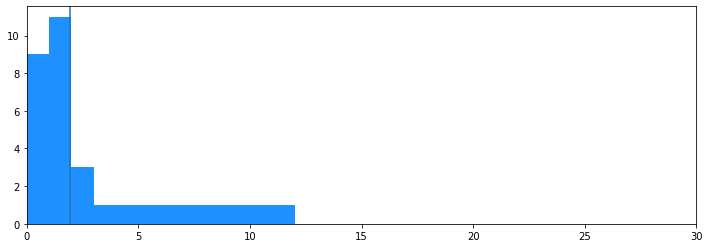

48 2.4069999999999823


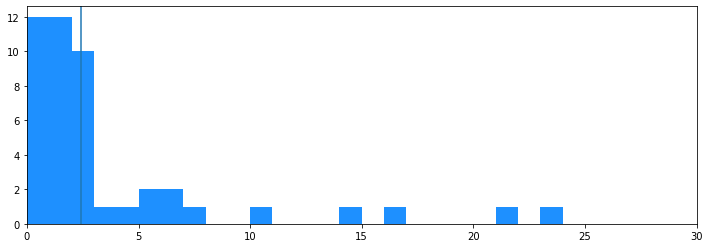

27 3.2280000000000086


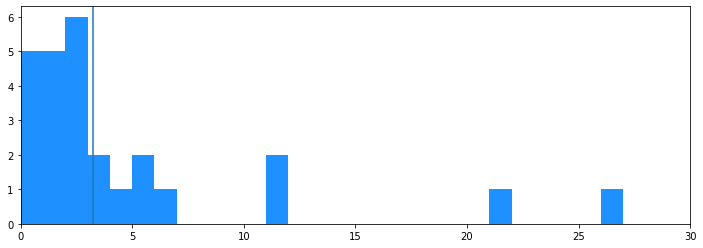

34 1.2549999999999955


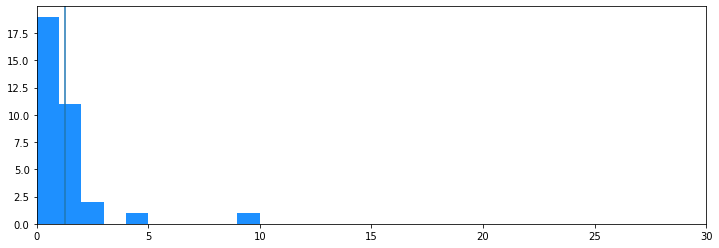

8 1.4869999999999983


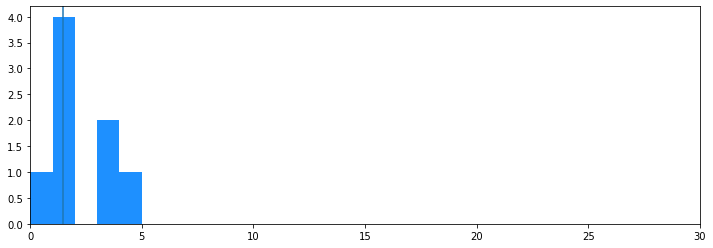

16 1.831000000000003


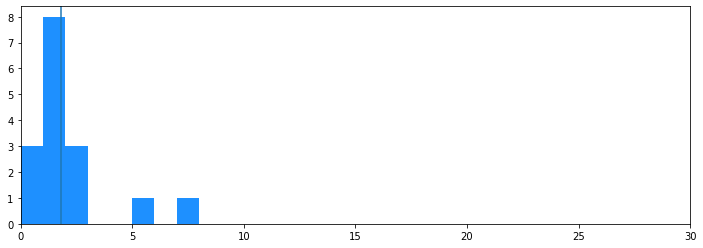

39 1.5360000000000014


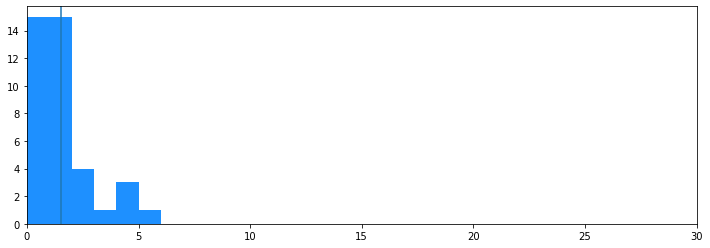

447 0.17099999999999227


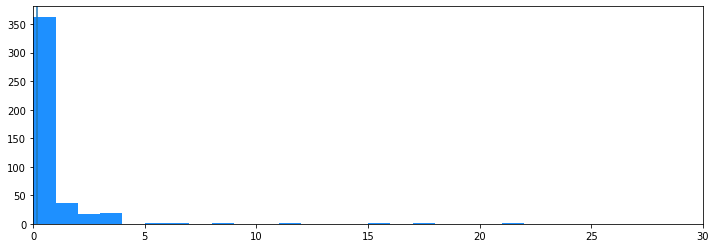

104 1.629999999999967


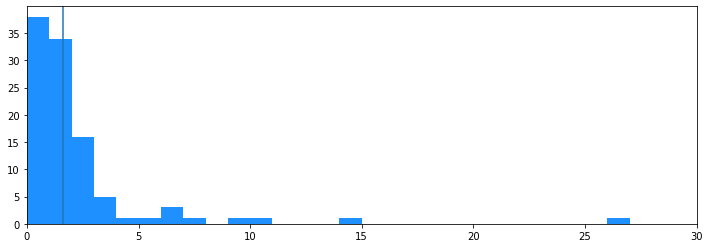

33 1.0349999999999966


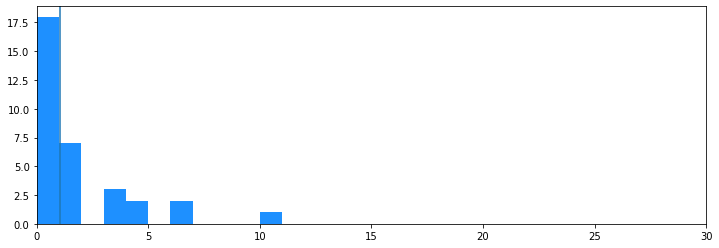

102 1.13600000000001


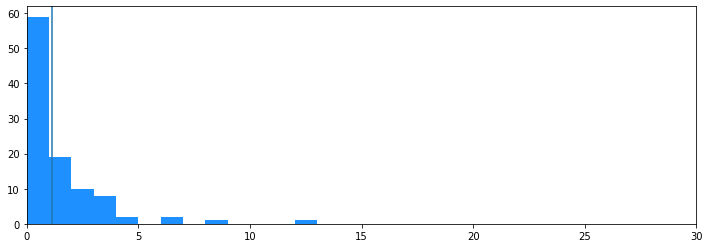

17 2.0630000000000024


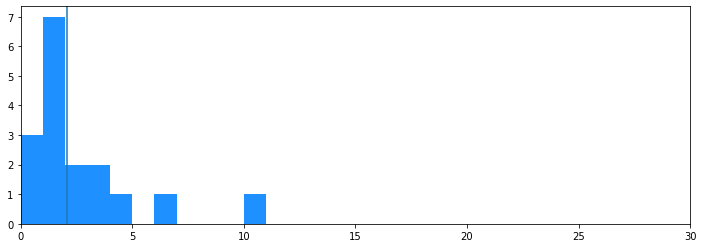

36 1.597999999999999


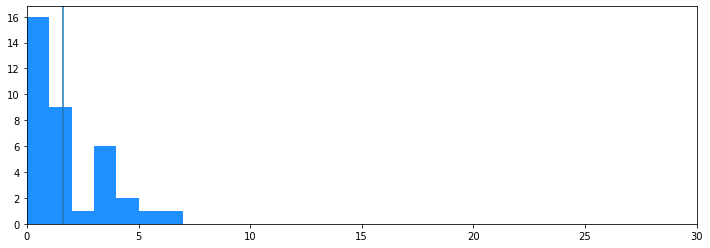

43 1.6979999999999933


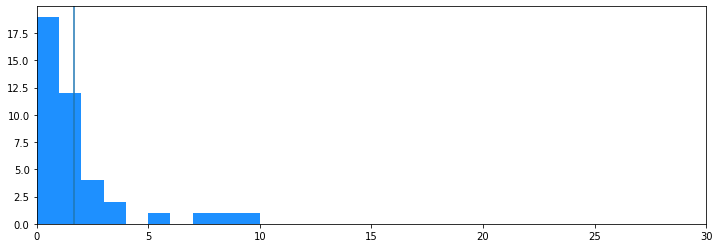

16 1.9720000000000013


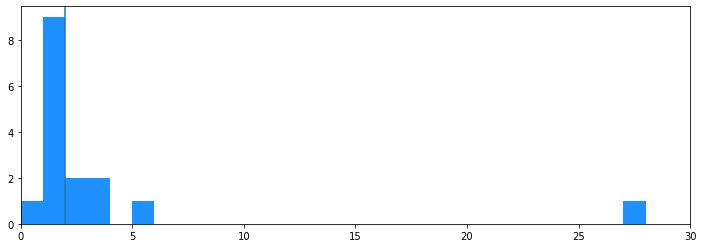

4 3.5760000000000005


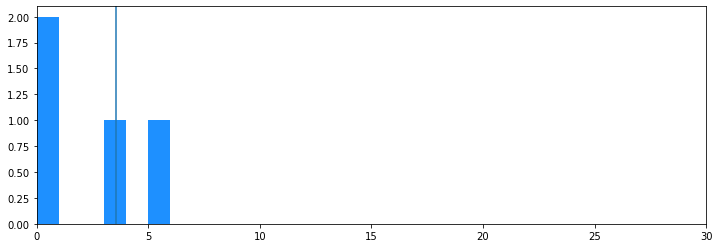

30 1.1240000000000094


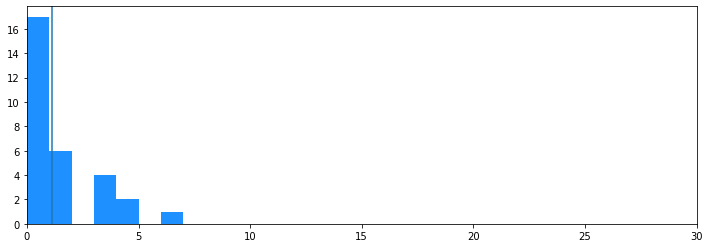

131 0.7430000000000518


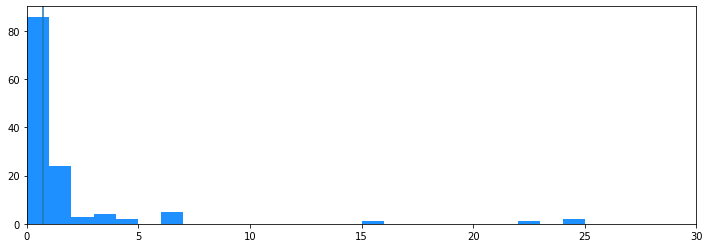

299 0.05000000000001137


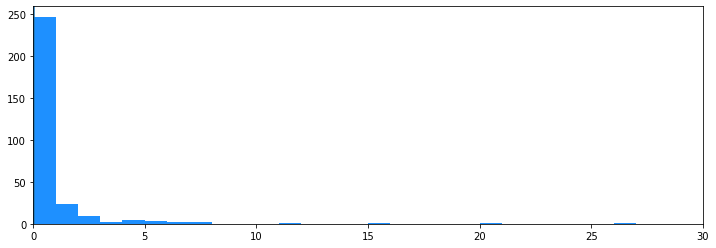

87 0.9459999999999695


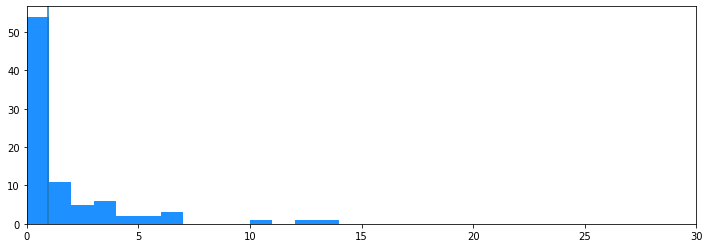

185 0.6419999999999959


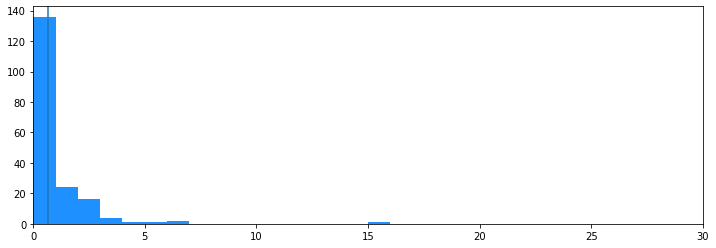

89 2.180000000000007


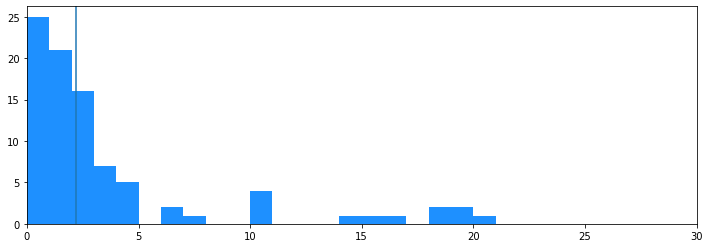

97 0.7929999999999993


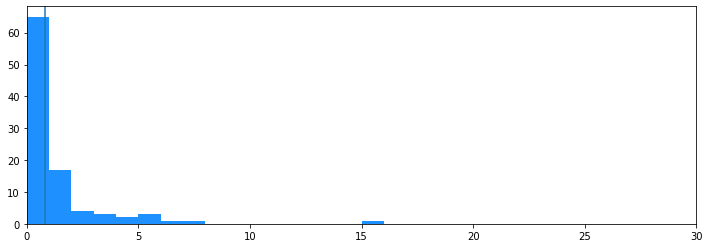

6 1.6640000000000157


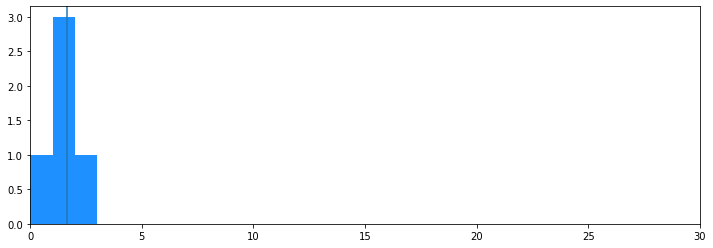

2 5.774


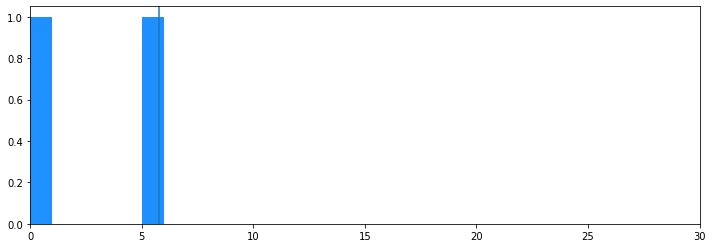

1630 0.05099999999998772


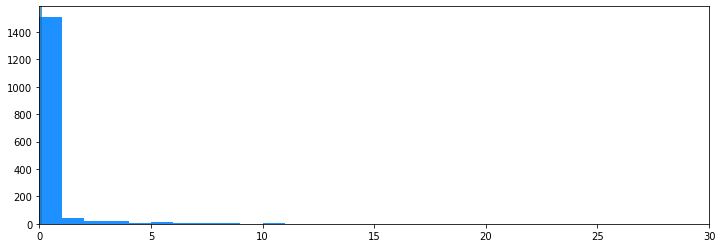

113 1.1759999999999877


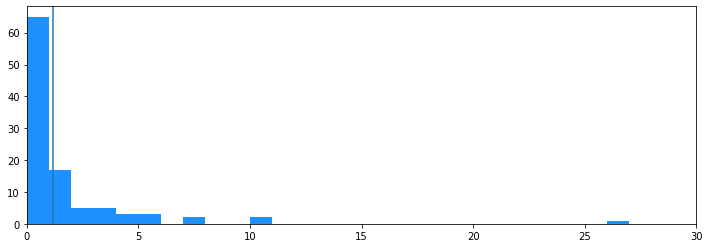

47 1.2639999999999993


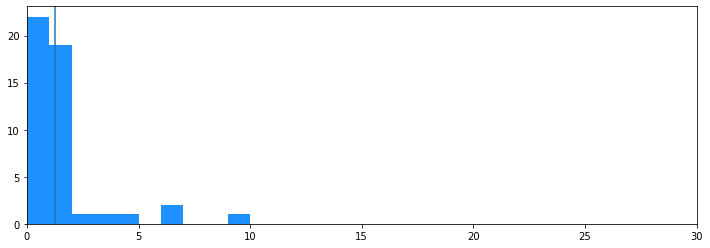

271 0.2230000000000132


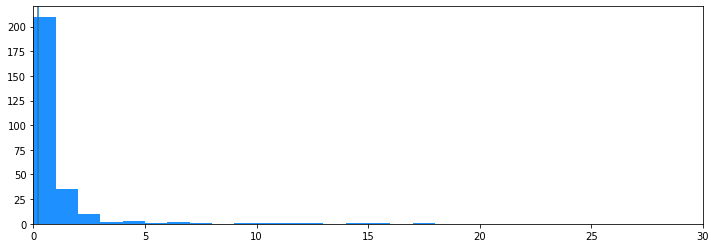

3 2.7060000000000013


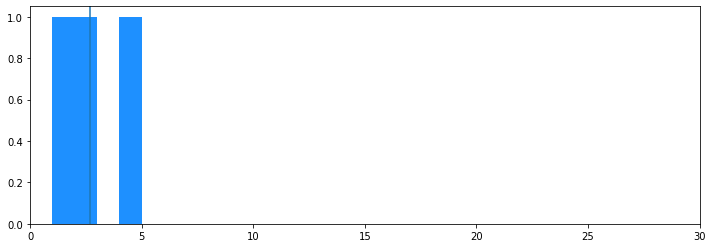

130 1.835999999999956


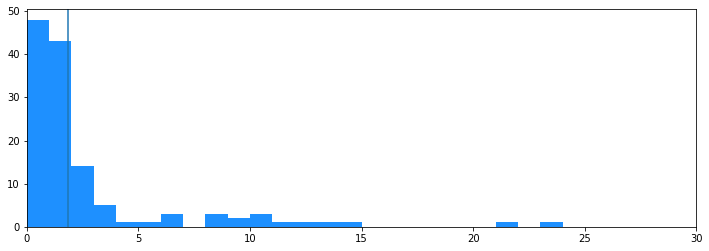

40 1.668999999999997


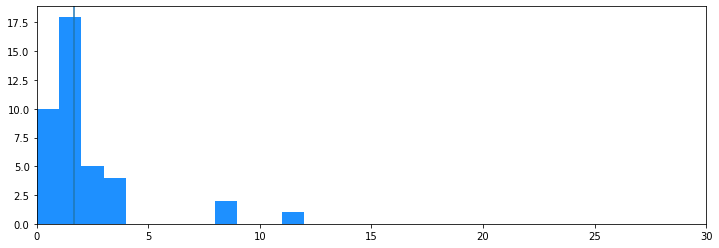

70 2.0299999999999727


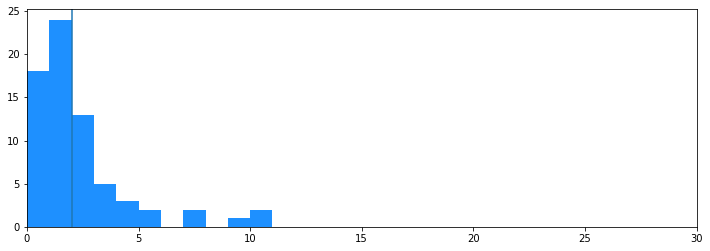

189 0.7889999999997599


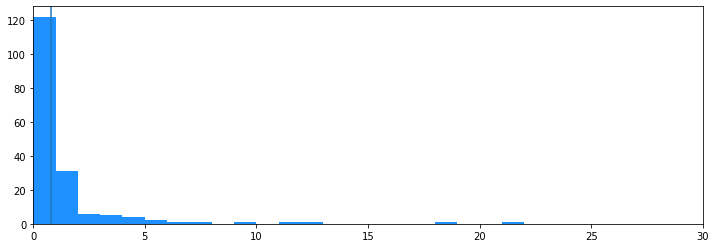

3 4.845


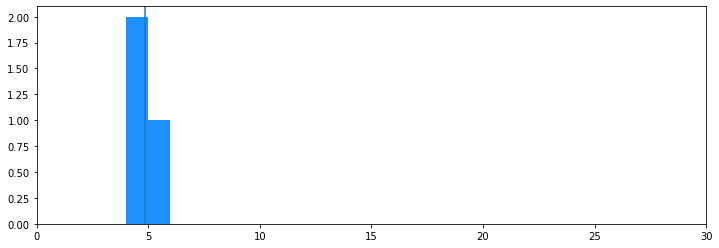

2 2.976


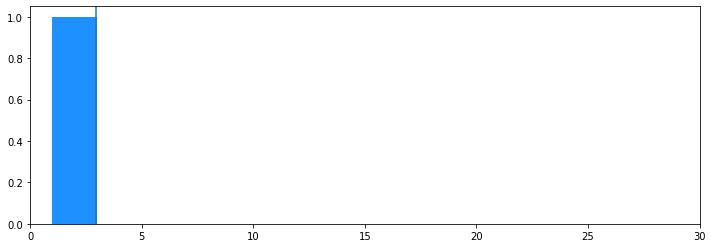

57 0.7139999999999986


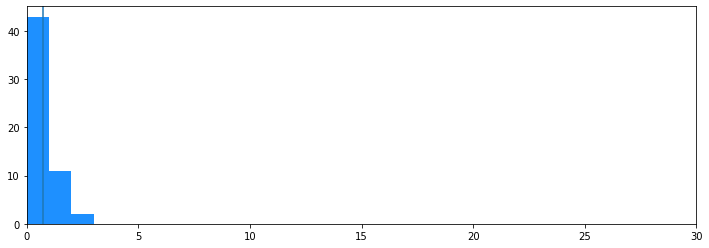

13 1.5929999999999964


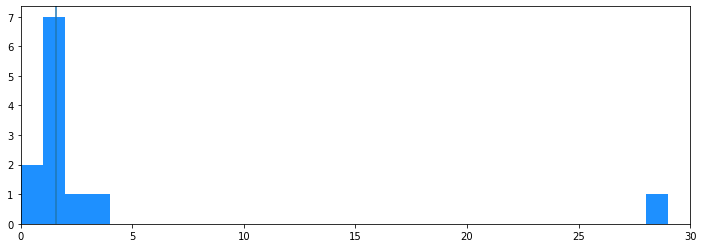

50 1.3759999999999764


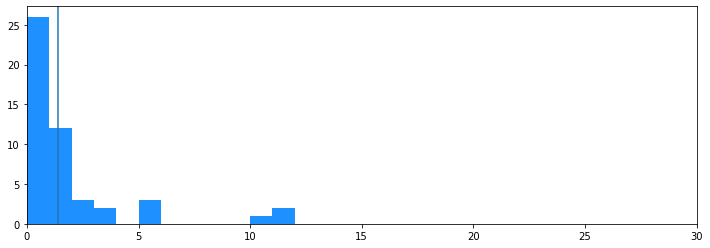

162 0.2759999999999536


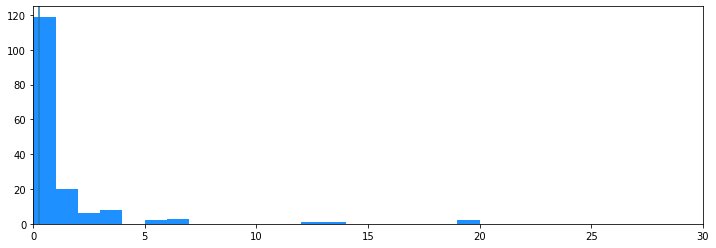

169 0.7139999999999986


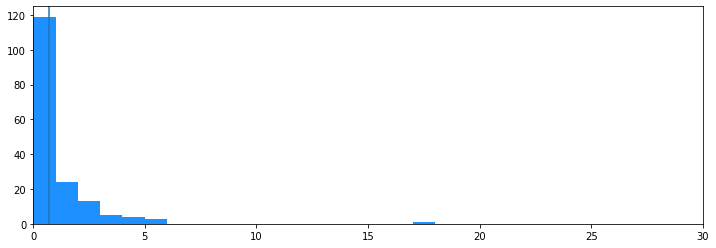

In [21]:
plot_cumulative(breaks, 50, 0.6)

116 2.0420000000000016


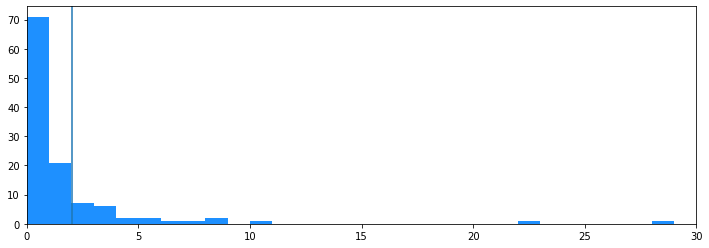

48 5.177


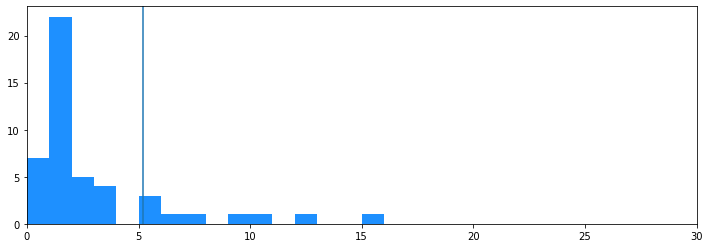

21 4.440999999999974


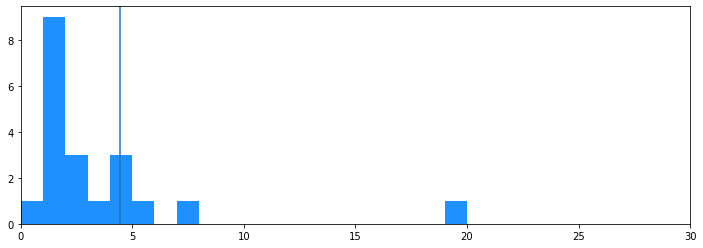

6 2.349


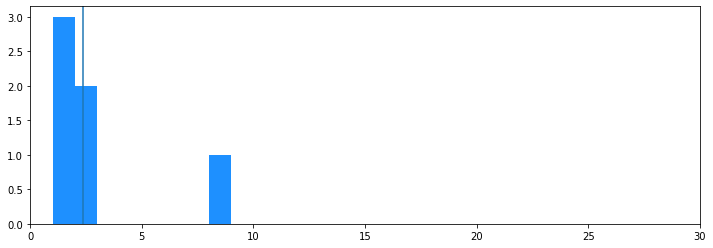

318 1.38900000000001


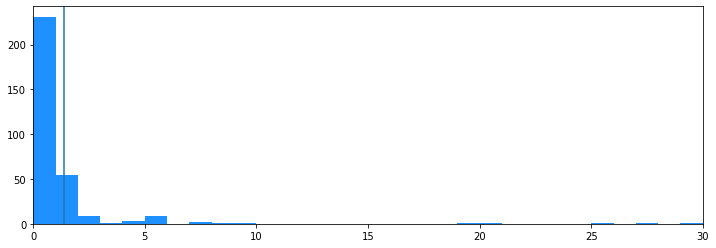

79 2.937000000000012


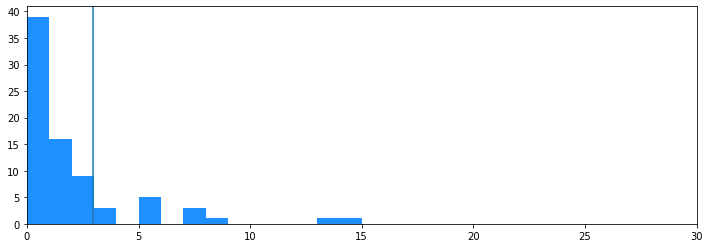

17 2.2079999999999984


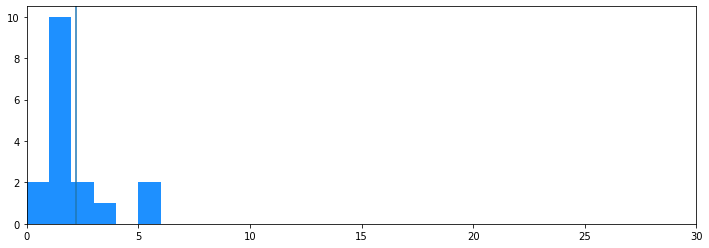

32 5.119


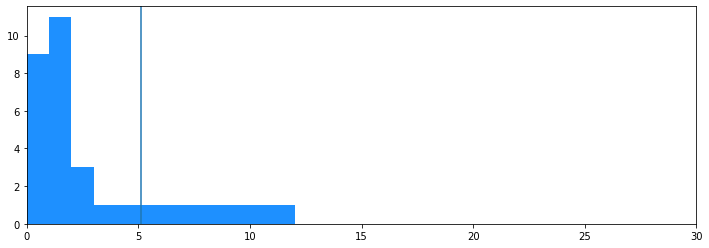

48 6.0400000000000205


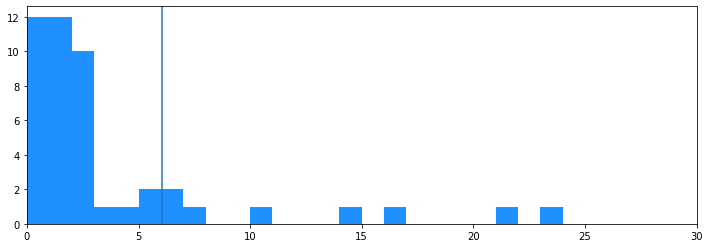

34 1.8339999999999996


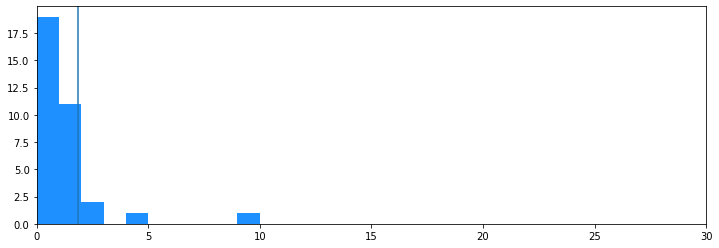

8 3.564


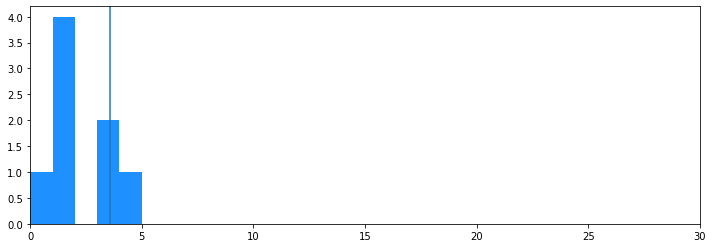

16 2.838000000000001


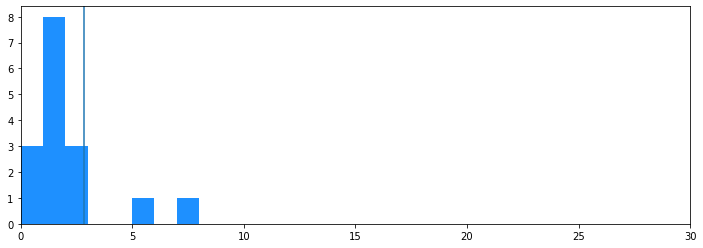

39 2.570999999999998


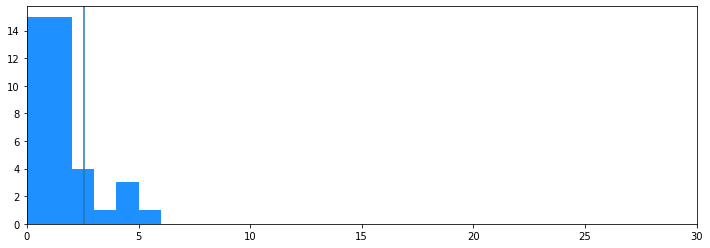

447 0.8940000000000055


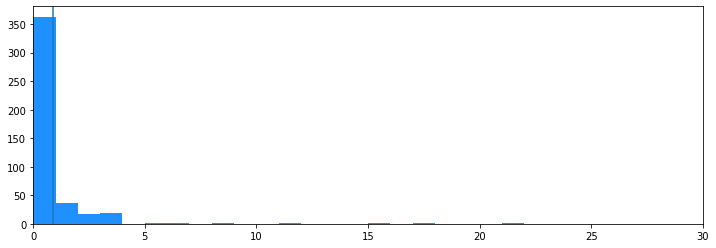

104 2.5849999999999795


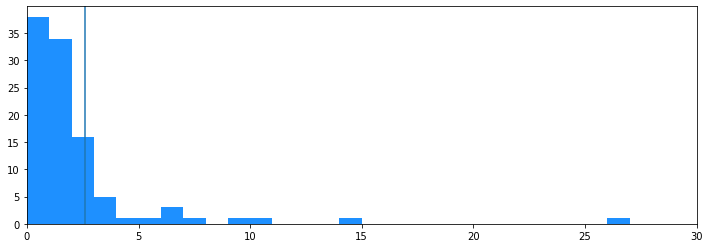

33 3.830999999999989


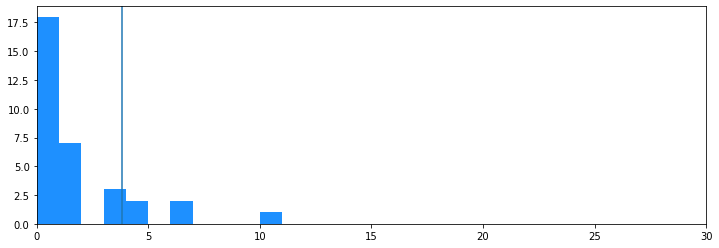

102 2.3249999999999886


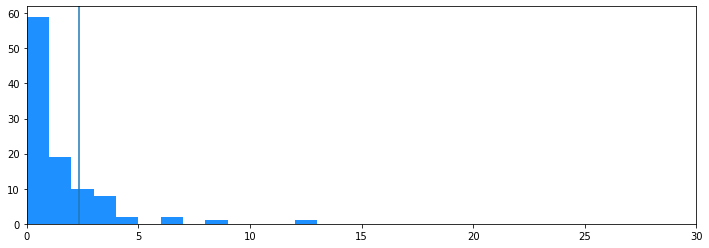

17 3.600999999999999


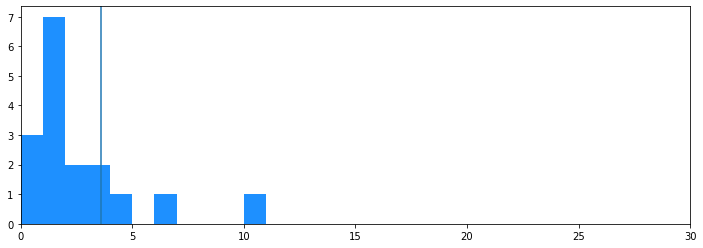

36 3.5679999999999996


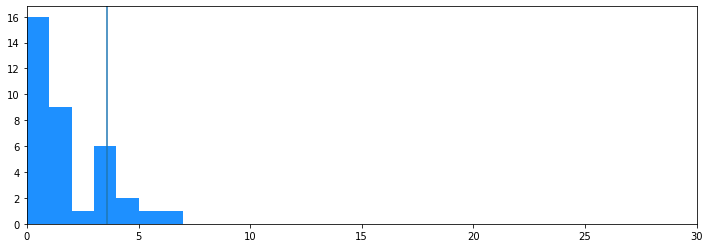

43 2.646000000000001


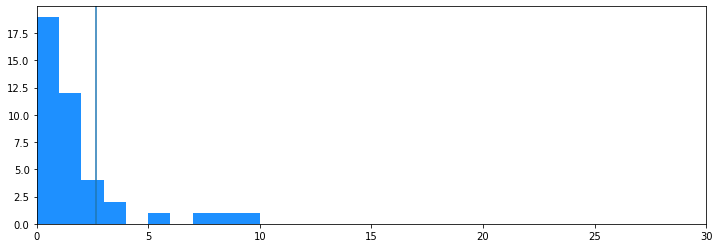

16 3.149000000000001


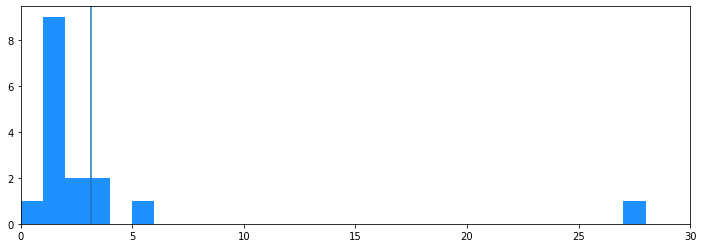

4 5.833


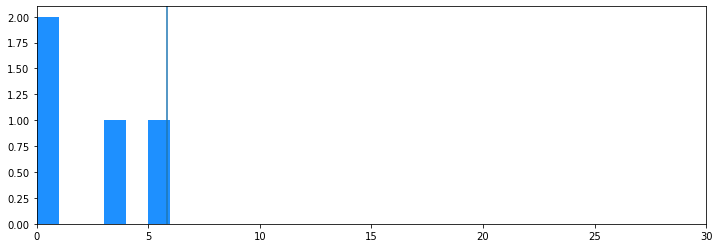

30 3.804000000000002


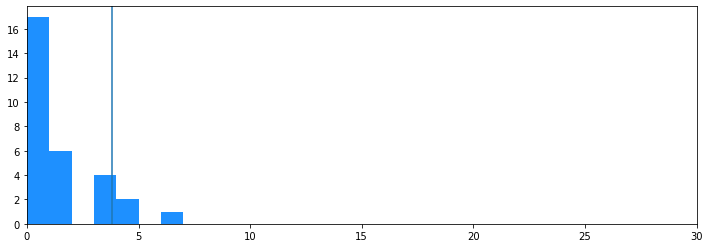

299 0.5549999999999997


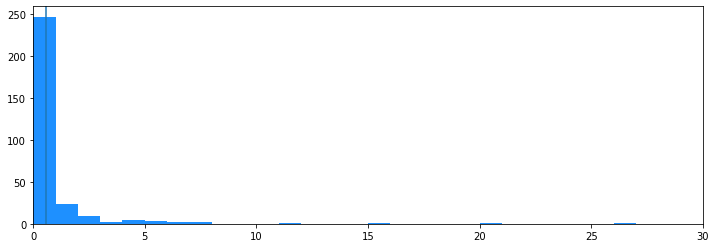

87 2.5579999999999927


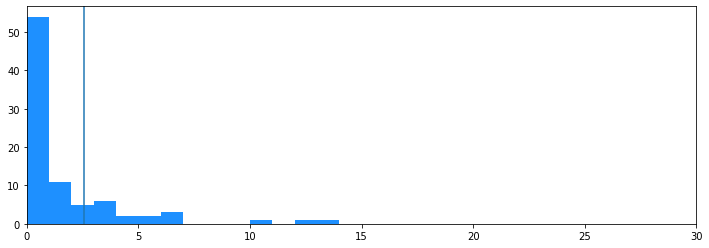

185 1.3079999999999927


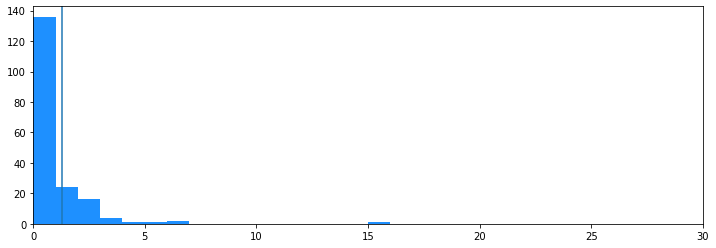

89 4.6580000000000155


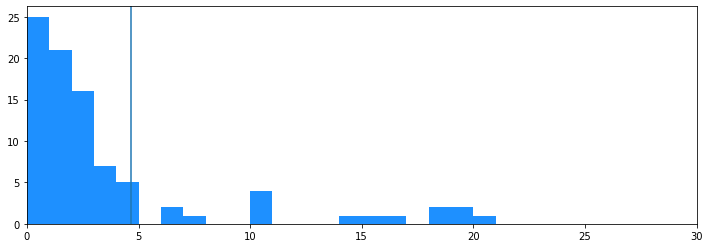

97 1.4300000000000068


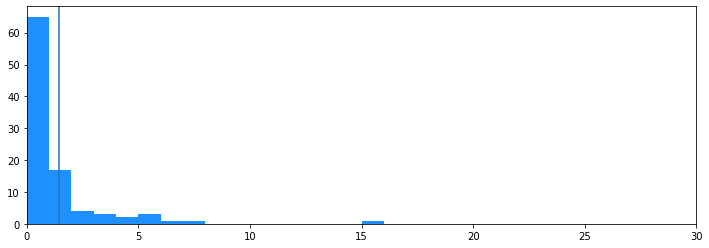

6 2.0209999999999866


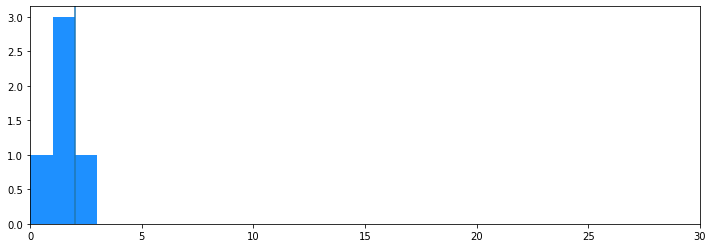

2 5.774


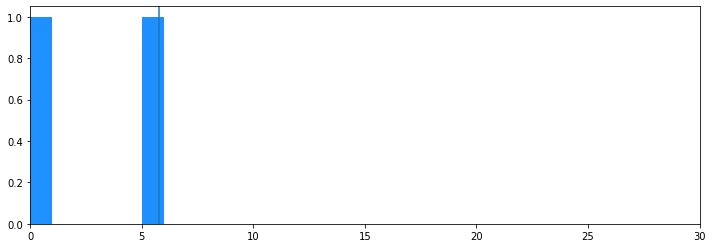

113 3.8999999999999773


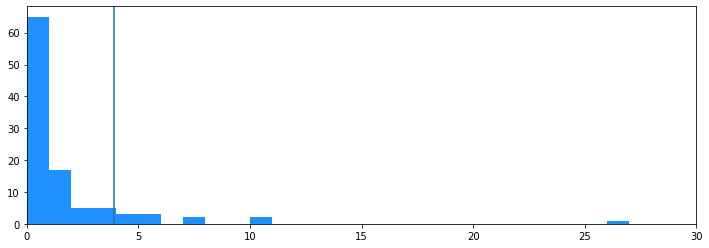

47 1.6850000000000023


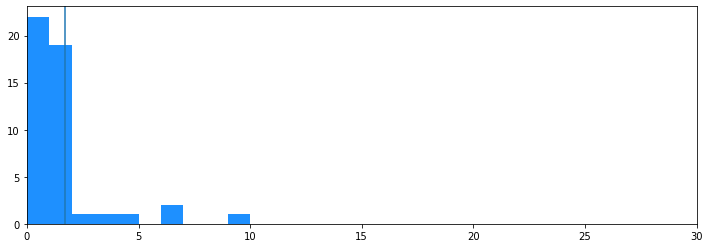

271 1.108000000000004


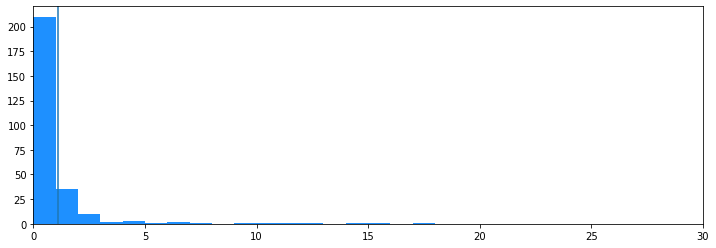

3 4.119


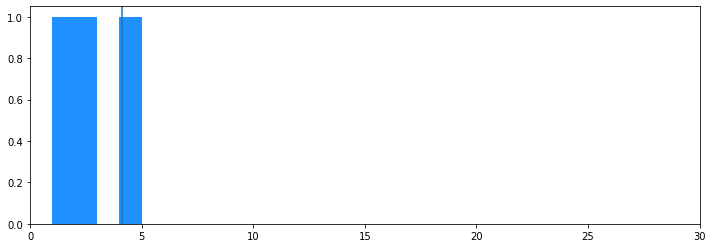

130 2.88900000000001


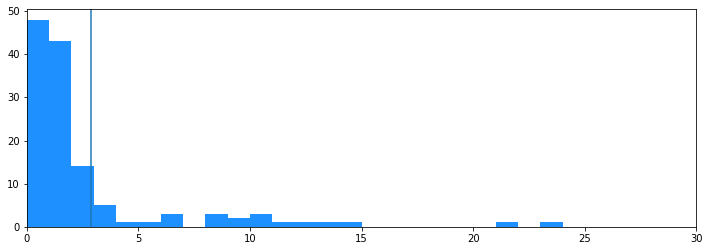

40 2.6610000000000014


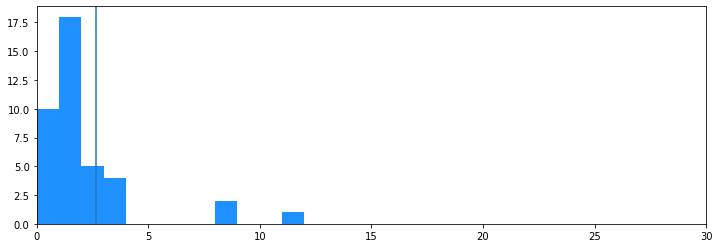

70 3.0060000000000002


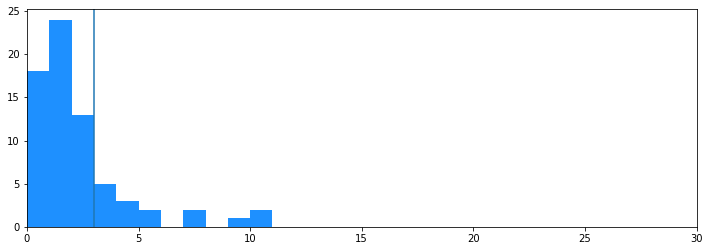

189 1.830000000000041


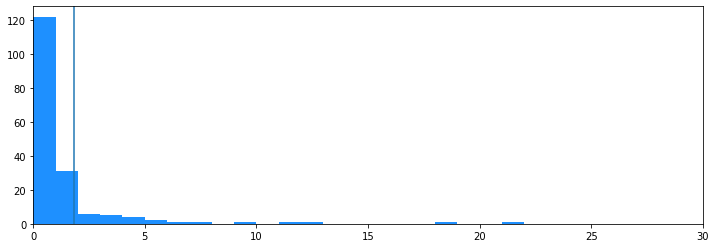

3 5.789999999999999


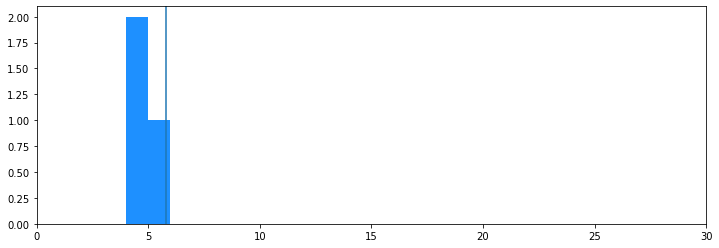

2 2.976


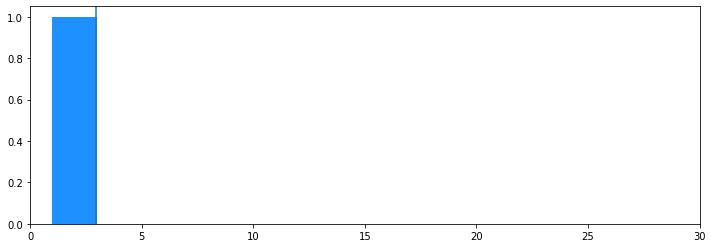

50 2.844999999999999


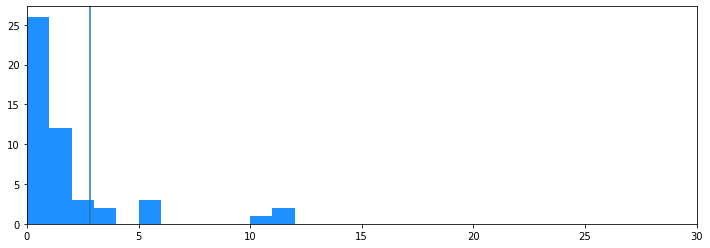

162 1.3929999999999723


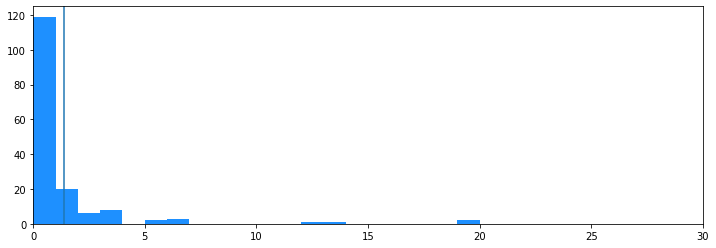

169 1.4980000000000047


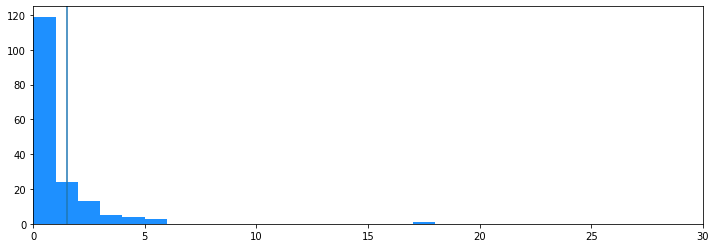

362 1.058999999999969


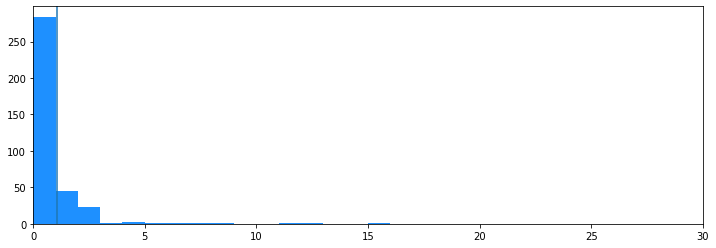

135 1.4699999999999989


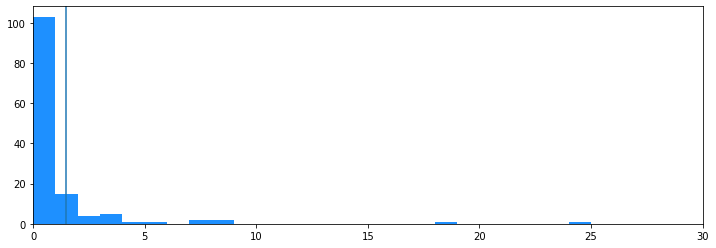

142 0.8290000000000077


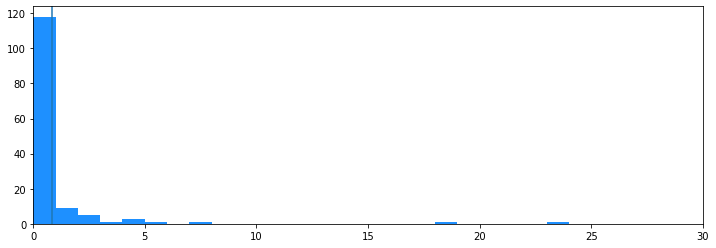

163 2.9039999999999964


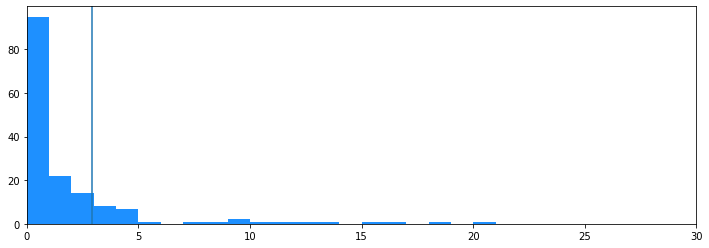

25 4.105000000000004


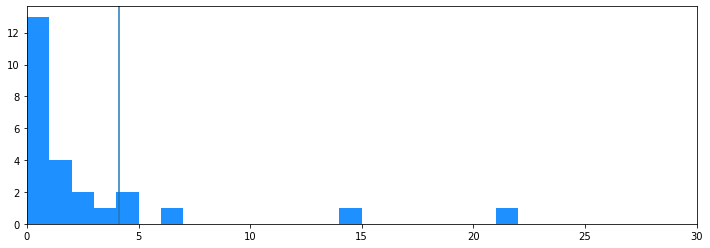

51 1.6750000000000114


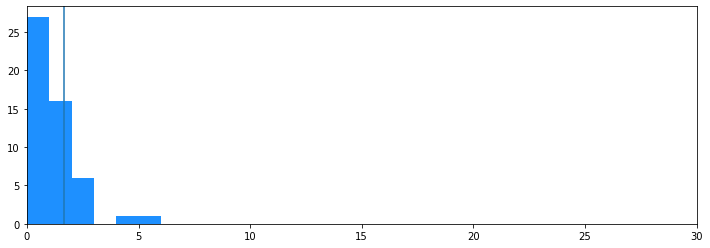

26 3.2720000000000056


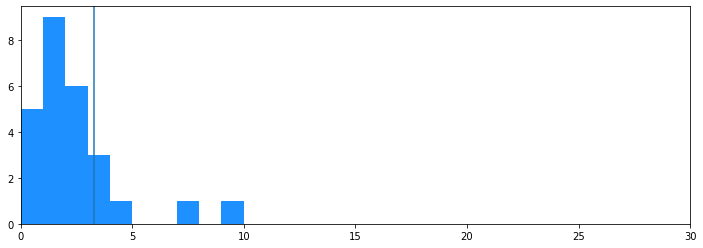

In [57]:
plot_cumulative(breaks, 50, 0.8)

116 3.359999999999957


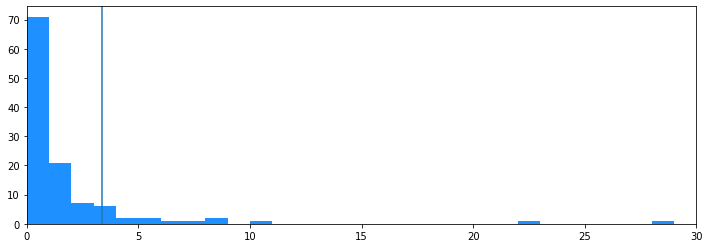

48 9.524999999999991


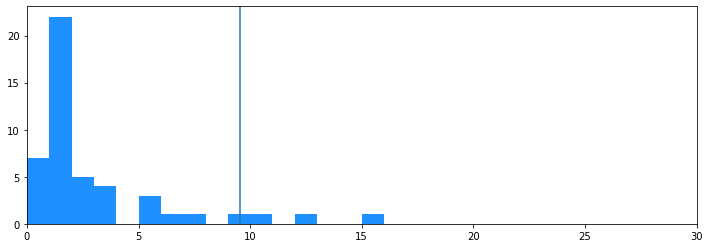

21 7.7070000000000505


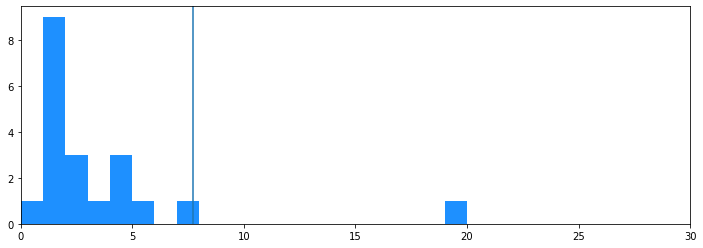

6 8.642


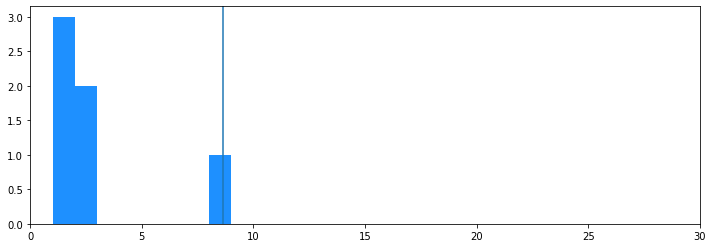

318 2.237999999999971


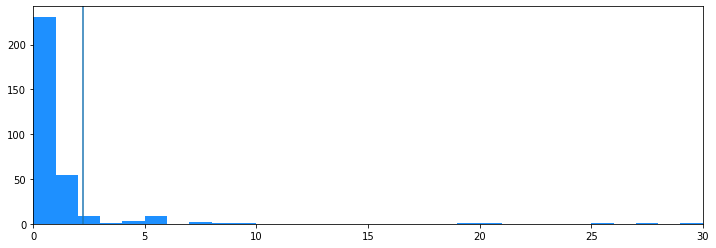

79 5.721000000000004


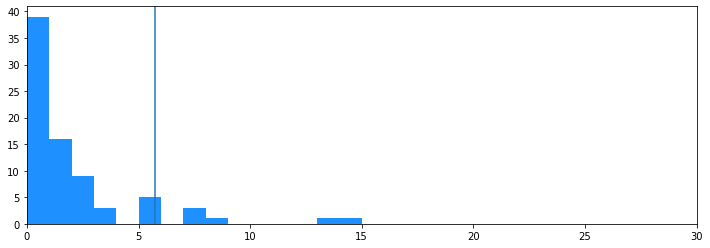

17 5.373


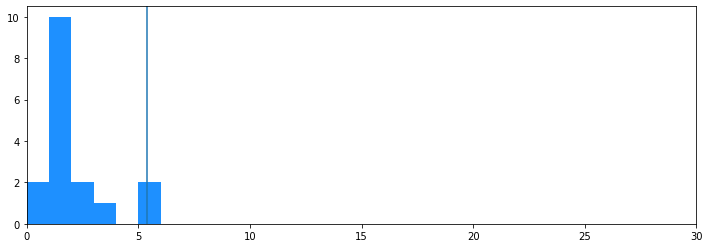

32 8.244


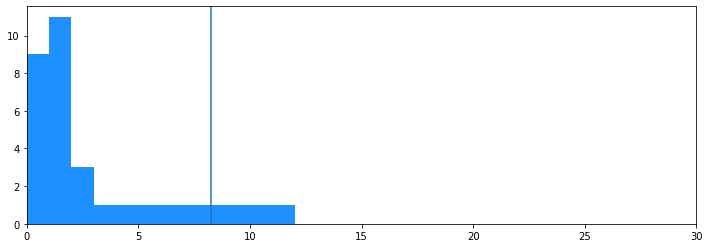

48 16.721000000000004


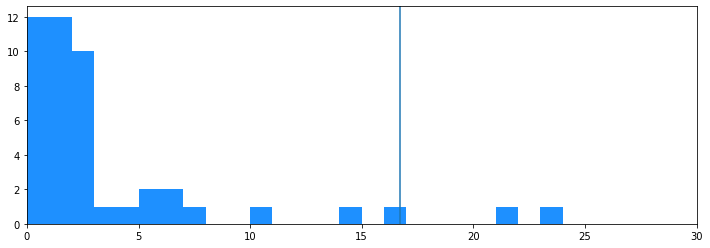

34 2.003


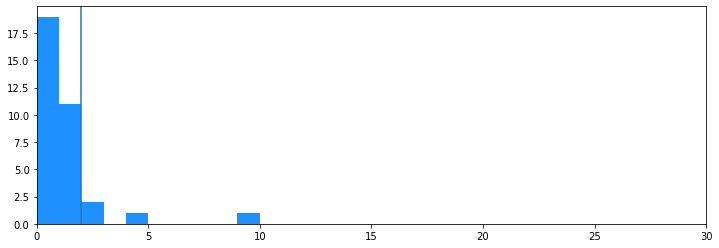

8 4.108


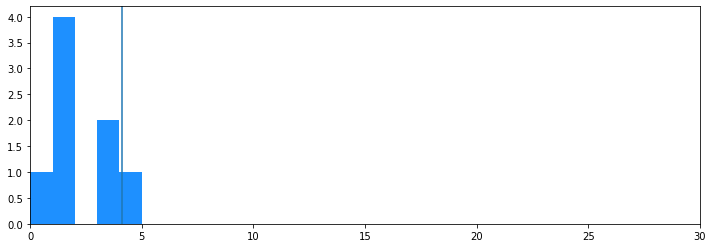

16 5.642000000000003


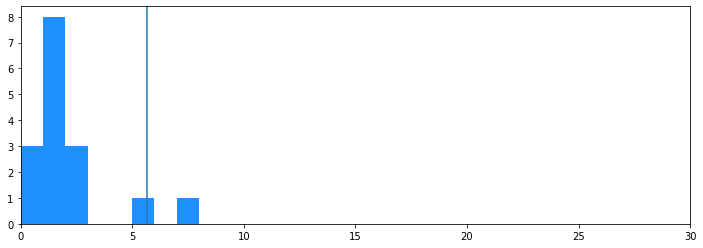

39 4.405999999999999


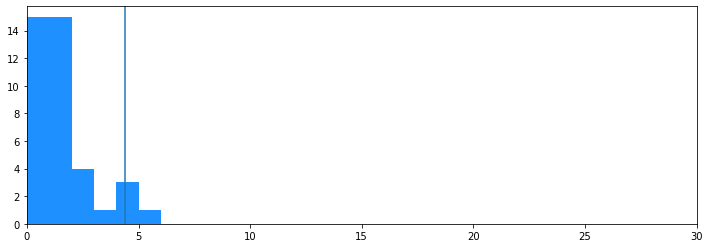

447 2.0190000000000055


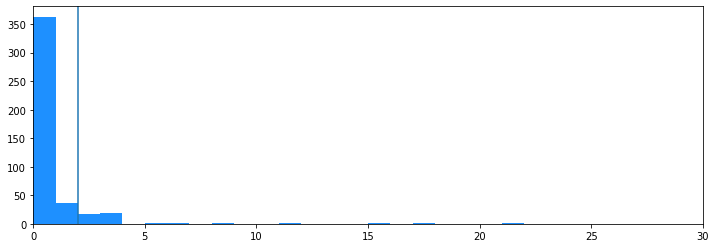

104 4.224999999999994


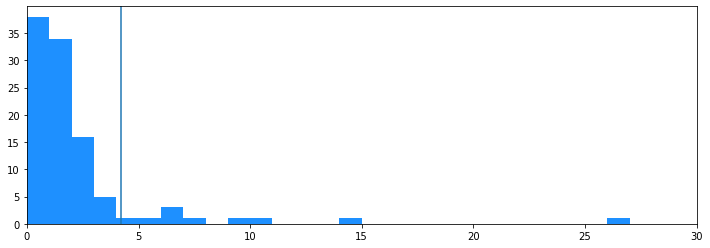

33 4.753999999999991


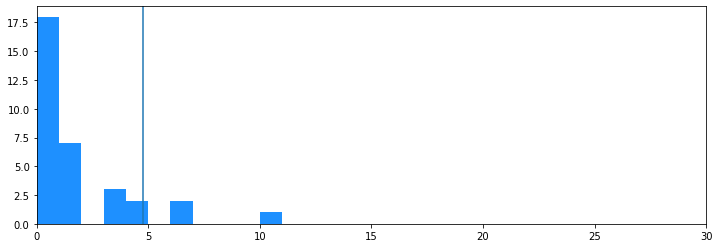

102 3.610000000000001


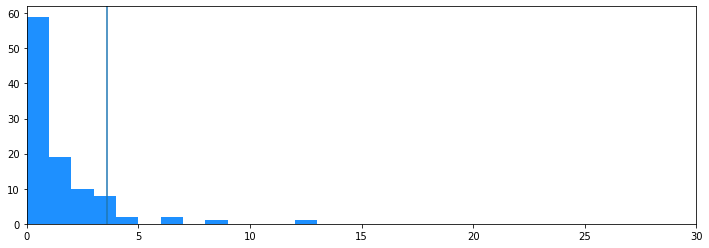

17 6.424000000000007


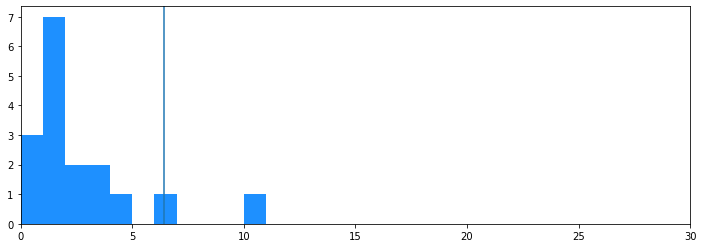

36 4.713999999999999


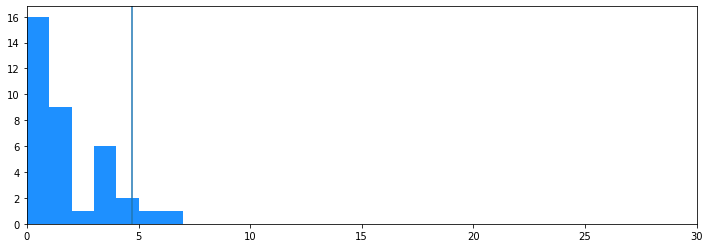

43 7.1


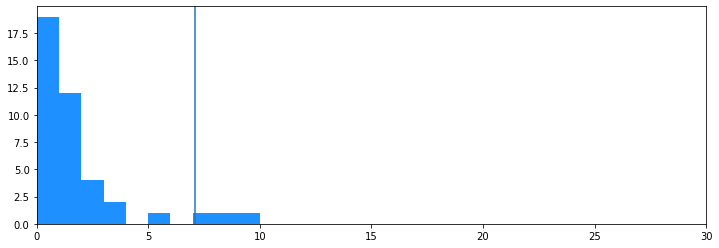

16 5.489000000000004


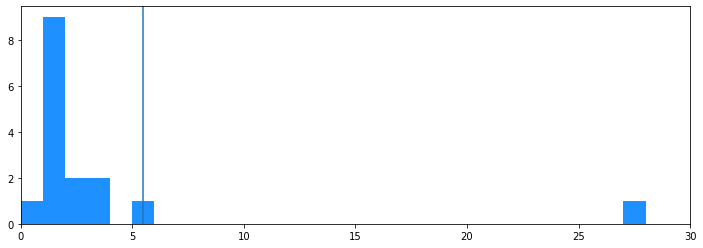

4 5.833


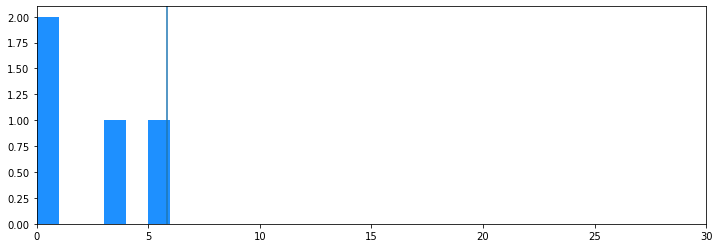

30 4.429999999999993


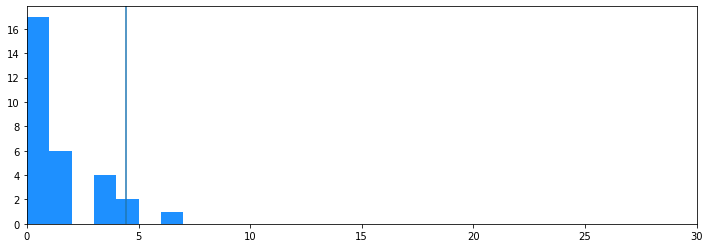

299 1.6019999999999754


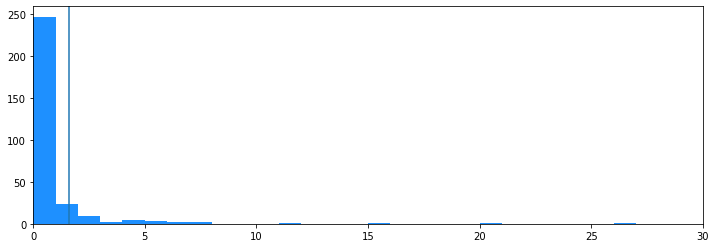

87 5.266999999999996


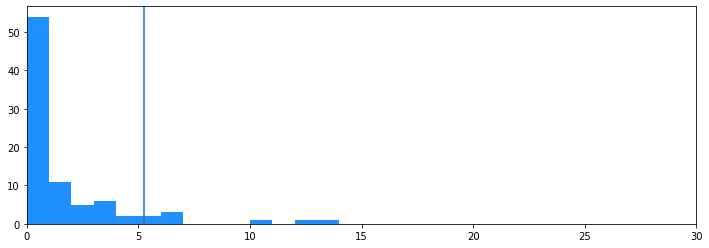

185 2.337999999999994


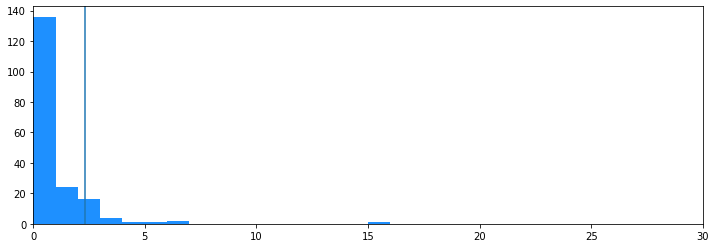

89 10.52600000000001


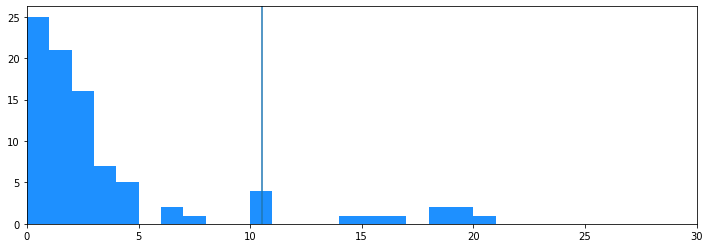

97 3.459000000000003


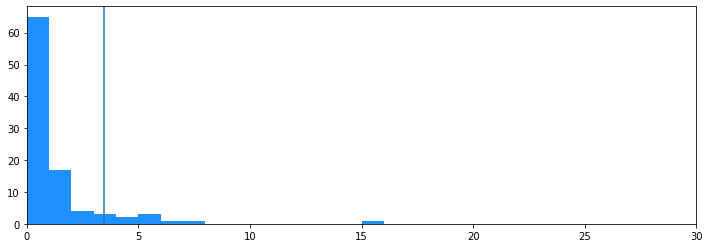

6 167.366


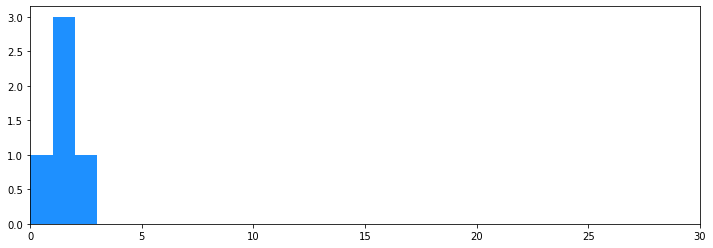

2 5.774


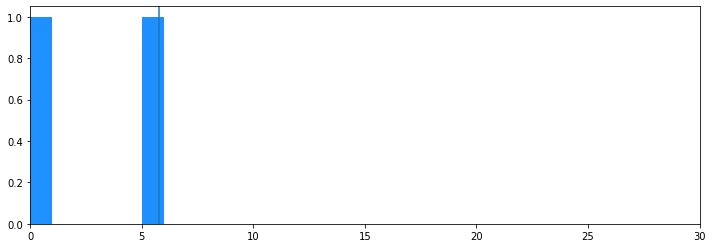

113 10.922000000000025


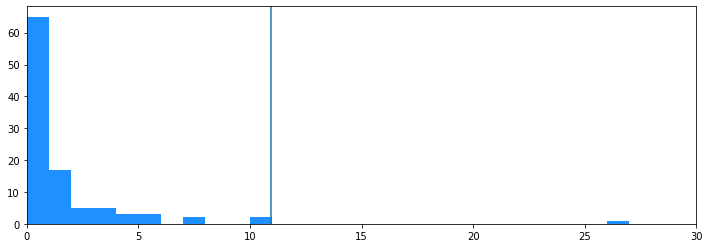

47 3.679000000000002


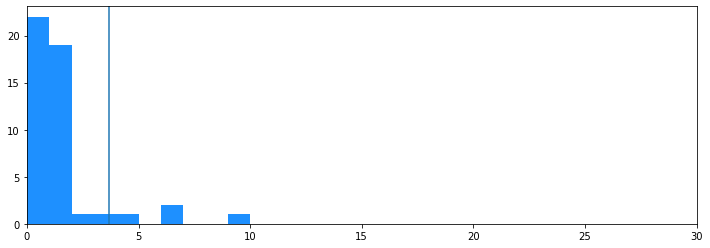

271 1.9029999999999916


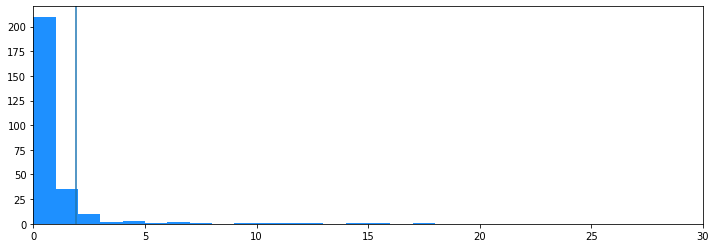

3 4.119


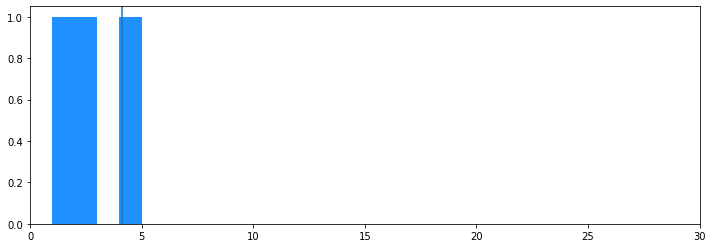

130 8.720999999999975


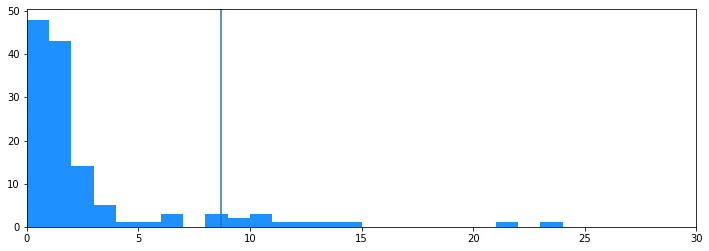

40 3.7020000000000124


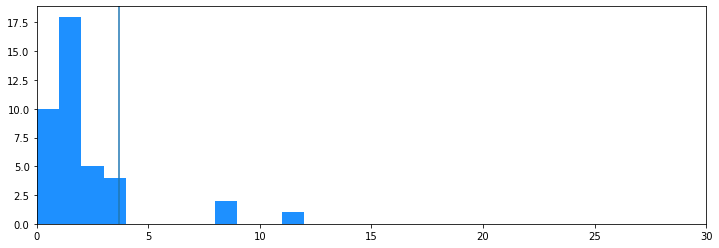

70 5.401999999999987


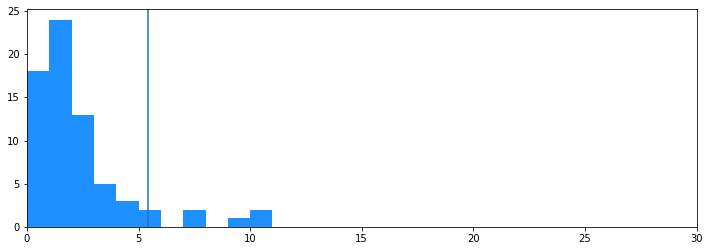

189 6.913999999999987


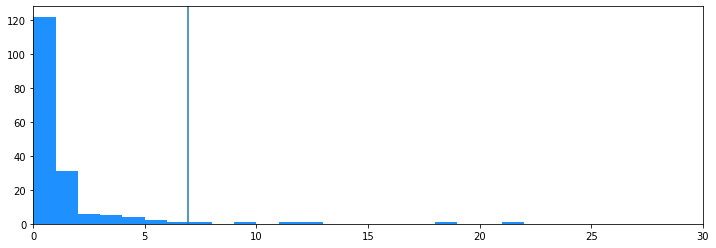

3 5.789999999999999


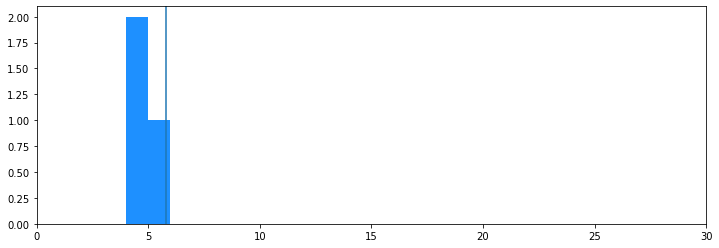

2 2.976


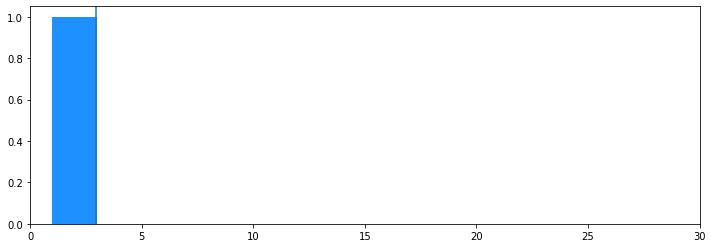

50 5.856999999999999


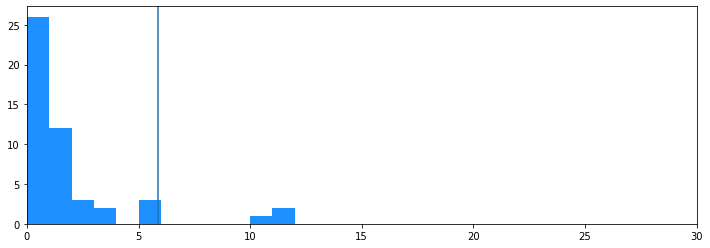

162 3.0


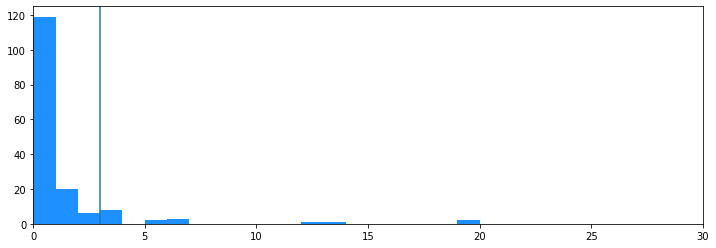

169 2.671999999999997


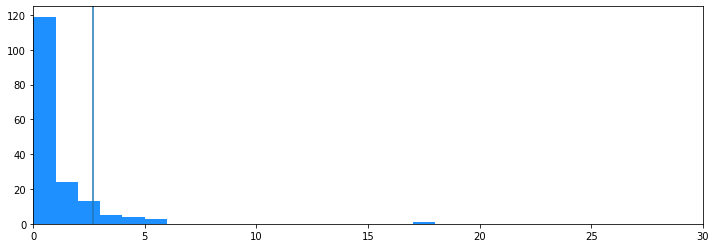

362 1.92999999999995


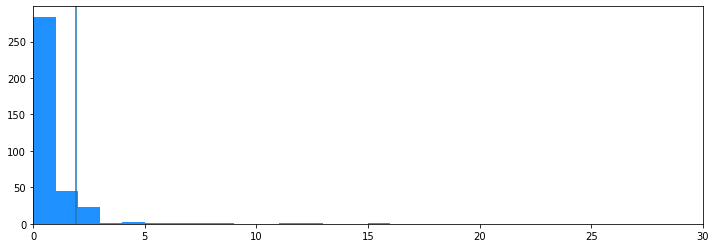

135 2.8840000000000003


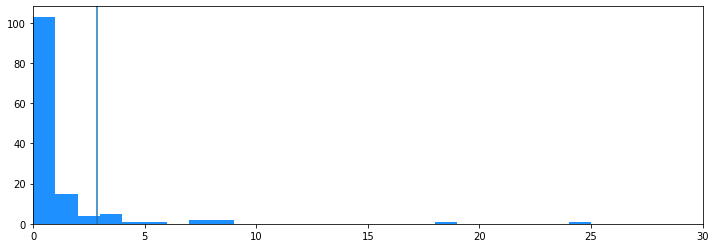

142 2.125


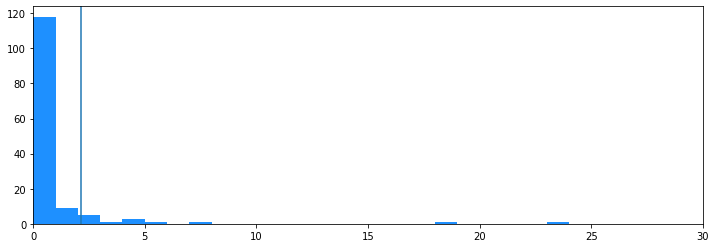

163 5.178999999999974


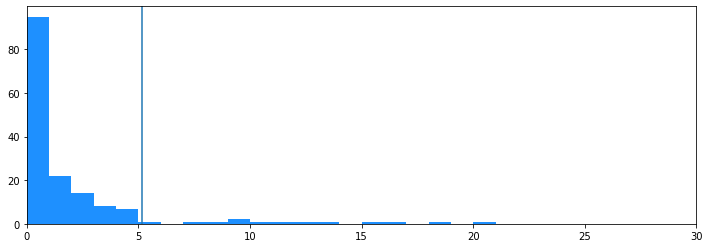

25 6.513000000000005


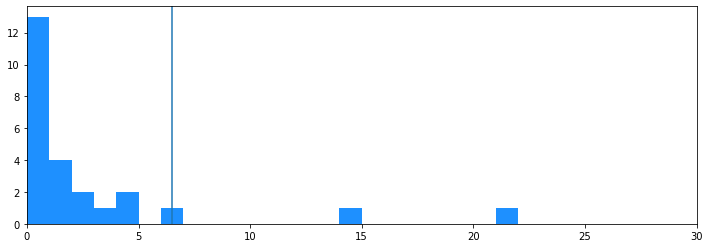

51 2.6099999999999994


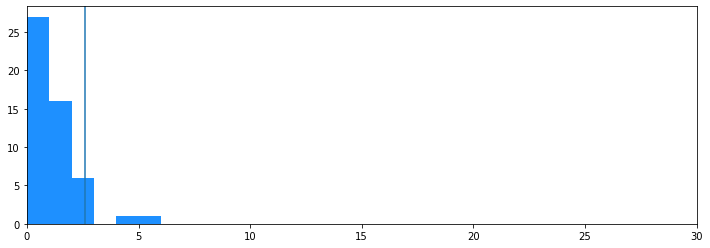

26 4.991000000000001


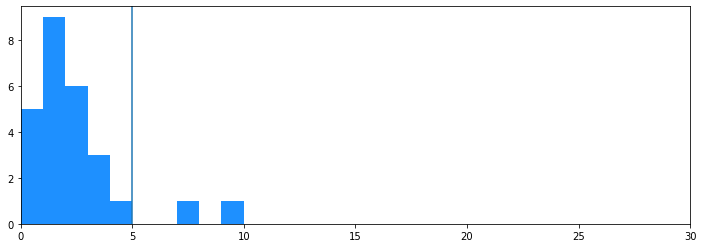

In [58]:
plot_cumulative(breaks, 50, 0.9)

In [63]:
lens = [len(breaks[br]['distribution']) for br in breaks]

In [66]:
max(lens)

1243